Processing Salman.jpg...


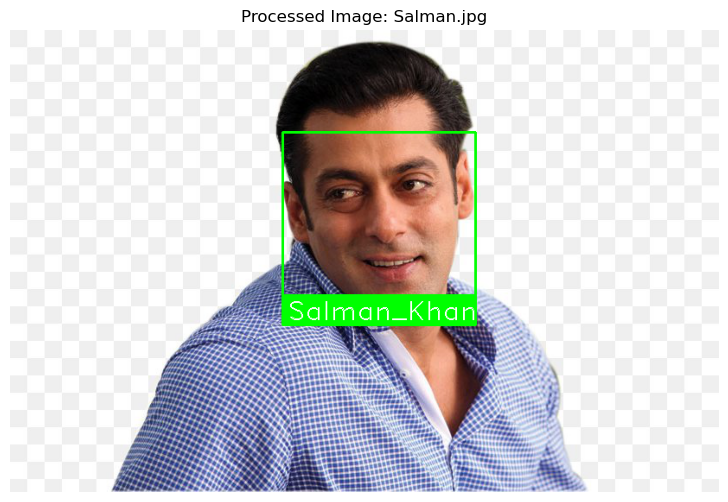

Processing Salman_Khan_group_2.png...


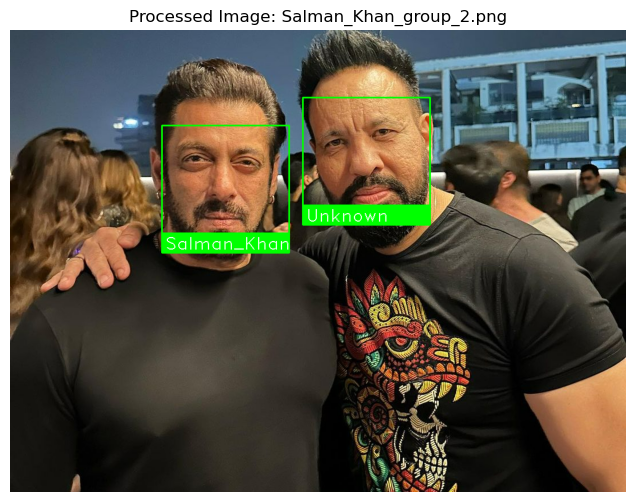

In [1]:
import cv2
import face_recognition
import numpy as np
import os
import matplotlib.pyplot as plt
# Ensures plots display in the notebook
%matplotlib inline

# Directory to store known face images
KNOWN_FACES_DIR = "known_faces"
# Directory to store test images
TEST_IMAGES_DIR = "test_images"

def load_known_faces():
    known_face_encodings = []
    known_face_names = []
    
    # Load known faces
    for filename in os.listdir(KNOWN_FACES_DIR):
        if filename.endswith(('.jpg', '.png')):
            # Load image
            image_path = os.path.join(KNOWN_FACES_DIR, filename)
            image = face_recognition.load_image_file(image_path)
            # Get face encoding
            encoding = face_recognition.face_encodings(image)
            if len(encoding) > 0:  # Ensure at least one face is found
                known_face_encodings.append(encoding[0])
                known_face_names.append(os.path.splitext(filename)[0])
            else:
                print(f"No faces found in {filename}")
    
    return known_face_encodings, known_face_names

def recognize_faces_in_image(image_path, known_face_encodings, known_face_names):
    # Load test image
    test_image = face_recognition.load_image_file(image_path)
    # Convert to BGR for OpenCV processing (matplotlib expects RGB later)
    test_image_bgr = cv2.cvtColor(test_image, cv2.COLOR_RGB2BGR)
    
    # Find face locations and encodings
    face_locations = face_recognition.face_locations(test_image)
    face_encodings = face_recognition.face_encodings(test_image, face_locations)
    
    # Process each face
    for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
        # Compare with known faces
        matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
        name = "Unknown"
        
        # Find best match
        face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
        if len(face_distances) > 0:  # Ensure there are known faces
            best_match_index = np.argmin(face_distances)
            if matches[best_match_index]:
                name = known_face_names[best_match_index]
        
        # Draw rectangle and label
        cv2.rectangle(test_image_bgr, (left, top), (right, bottom), (0, 255, 0), 2)
        cv2.rectangle(test_image_bgr, (left, bottom - 35), (right, bottom), (0, 255, 0), cv2.FILLED)
        font = cv2.FONT_HERSHEY_DUPLEX
        cv2.putText(test_image_bgr, name, (left + 6, bottom - 6), font, 1.0, (255, 255, 255), 1)
    
    # Convert BGR back to RGB for matplotlib display
    test_image_rgb = cv2.cvtColor(test_image_bgr, cv2.COLOR_BGR2RGB)
    
    # Display image using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(test_image_rgb)
    plt.title(f"Processed Image: {os.path.basename(image_path)}")
    plt.axis('off')  # Hide axes
    plt.show()

def main():
    # Create directories if they don't exist
    os.makedirs(KNOWN_FACES_DIR, exist_ok=True)
    os.makedirs(TEST_IMAGES_DIR, exist_ok=True)
    
    # Load known faces
    known_face_encodings, known_face_names = load_known_faces()
    if not known_face_encodings:
        print("No known faces loaded. Please add images to 'known_faces' folder.")
        return
    
    # Process test images
    for filename in os.listdir(TEST_IMAGES_DIR):
        if filename.endswith(('.jpg', '.png')):
            image_path = os.path.join(TEST_IMAGES_DIR, filename)
            print(f"Processing {filename}...")
            recognize_faces_in_image(image_path, known_face_encodings, known_face_names)

# Run the main function
main()